In [1]:
#Fish Weight Predictions
#DecisionTree Classifier
#RandomForest Regressor
#Weight Estimations

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/kaggle/input/fisheriesweights/Fishes weight.csv


In [3]:
#Load the file
fish= pd.read_csv("../input/fisheriesweights/Fishes weight.csv")

In [4]:
#Display the the tables
fish.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish.shape

(159, 7)

In [6]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.200629,26.247170,28.415723,31.227044,8.970994,4.417486
std,356.025792,9.996441,10.716328,11.610246,4.286208,1.685804
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,635.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
#Checking for null values
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
#copy of fish file
df= fish.copy()

In [10]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Pike,Bream,Roach,Catla,Parkki,Mrigal,Reba,Smelt,Bata,Gheur,Pengba,Whitefish,Ticto Barb
Species,27,17,16,12,12,11,11,10,9,8,8,7,6,5


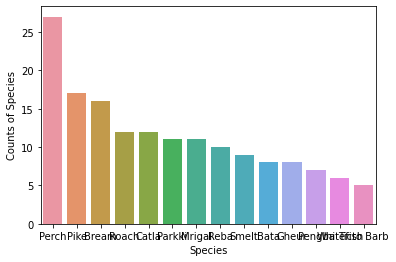

In [11]:
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

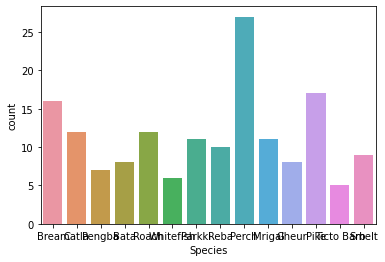

In [12]:
#MATPLOT BARS
sns.countplot(df['Species'])



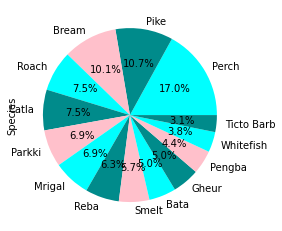

In [13]:
#PIE CHART VISUALIZATION

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

df['Species'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['cyan','darkcyan','pink'])

In [14]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

**Meanings of the Columns:**
* Species: Species name of fish
* Weight: Weight of fish in gram
* Length1: Vertical length in cm
* Length2: Diagonal length in cm
* Length3: Cross length in cm
* Height: Height in cm
* Width: Diagonal width in cm

Our dependent variable is 'Weight'. Independent variables are 'species', different lengths, 'height' and 'width'.

I will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish). 

In [15]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)

In [16]:
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


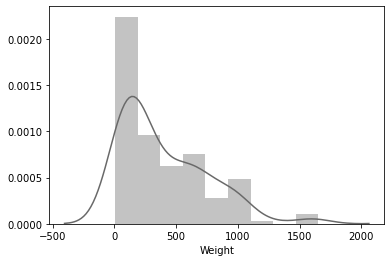

In [18]:
#Weight
sns.distplot(df['Weight'], color="DimGrey")


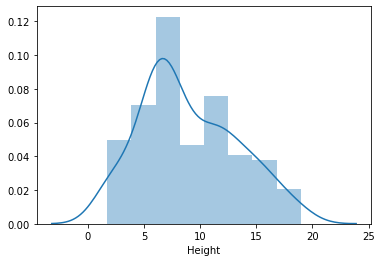

In [19]:
#Height
sns.distplot(df['Height'])

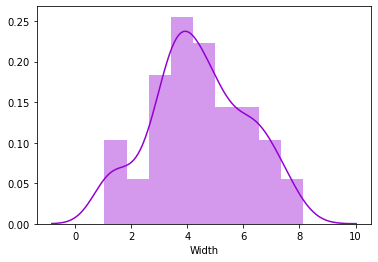

In [20]:
#Width
sns.distplot(df['Width'], color="darkviolet")

In [21]:
#Correlation of the variables
#Correlation helps us investigate and establish relationships between variables
#Note that high amount of correlation between independent variables suggest that linear regression estimation will be unreliable

In [22]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.916516,0.919642,0.925231,0.729297,0.883659
LengthVer,0.916516,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.919642,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.925231,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.729297,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.883659,0.867050,0.873547,0.878520,0.792881,1.000000


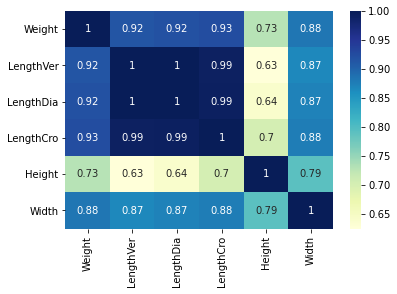

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

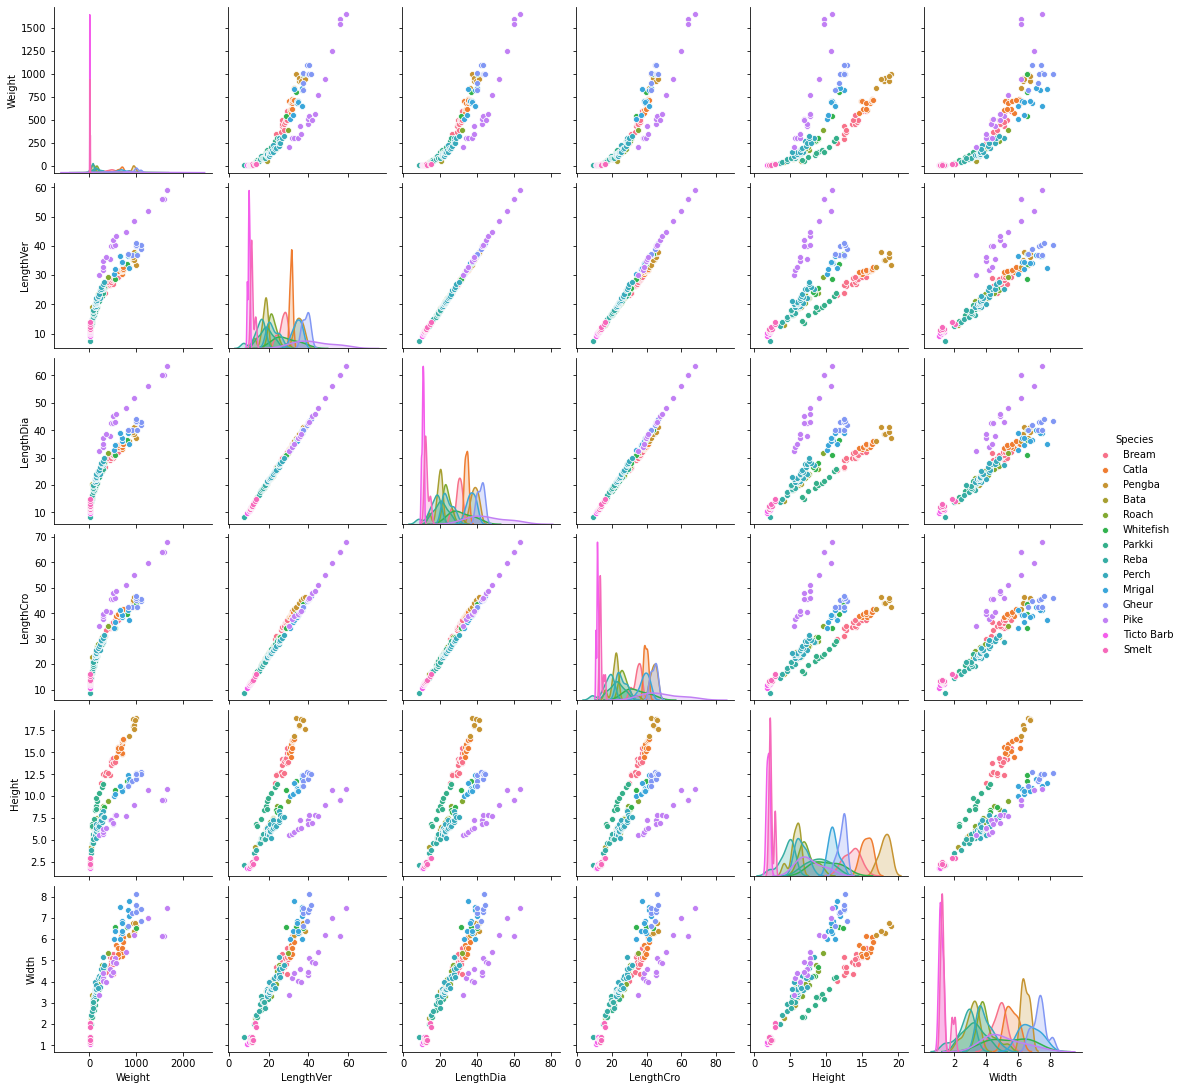

In [24]:
#Pairplot

g = sns.pairplot(df, kind='scatter', hue='Species');



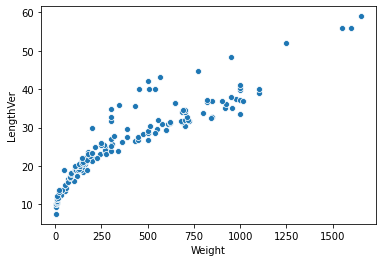

In [25]:
#scatterplot

sns.scatterplot(data=df, x="Weight", y="LengthVer")

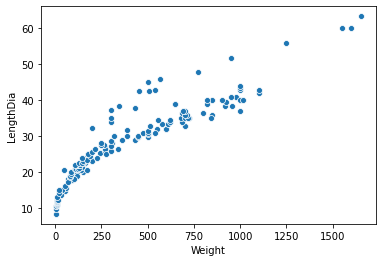

In [26]:
sns.scatterplot(data=df, x="Weight", y="LengthDia")

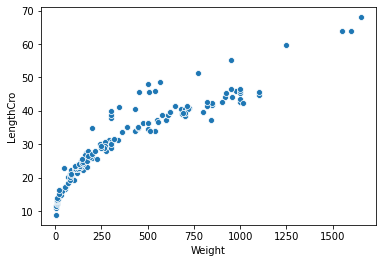

In [27]:
sns.scatterplot(data=df, x="Weight", y="LengthCro", palette="deep")

In [28]:
#so from scatterplot it is evident that there are outliers

In [29]:
#Basic statics of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.200629,356.025792,5.9000,120.00000,273.0000,635.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [30]:
#Analyzing and Dealing with Outliers

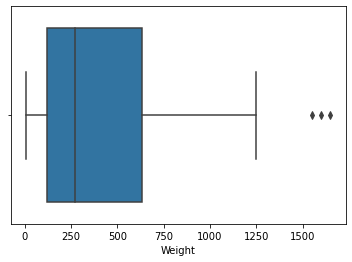

In [31]:
sns.boxplot(x=df['Weight']);
#Outliers

In [32]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [33]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

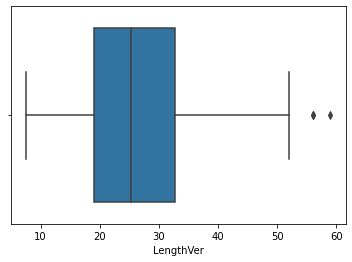

In [34]:
sns.boxplot(x=df['LengthVer']);

In [35]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

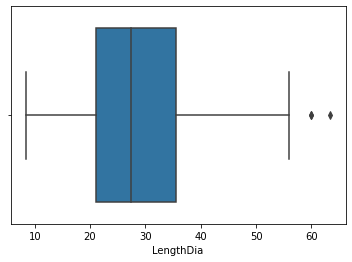

In [36]:
sns.boxplot(x=df['LengthDia']);

In [37]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [38]:
df[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [39]:
#In our dataset, index number 142, 143 and 144 are the outliers.
#So,I am going to erase these 3 data entries from my dataset.

df1 = df.drop([142,143,144])

In [40]:
df1.describe().T
#Reanalysing Basic Statistics After Eliminating Outliers

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.089103,317.306183,5.9000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [41]:
#Creating a ML Model and Training the model
#Separating Dependant and Independant Variables
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]

In [42]:
#Dividing Dataset into Train and Test Datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [44]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
y_head = reg.predict(X_train)

In [47]:
r2_score(y_train, y_head)

0.9961967746515143

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.88269779 0.93381911 0.92856466 0.98766669 0.98901587 0.9886237
 0.99131725 0.97559392 0.98644737 0.98621126]


In [49]:
#There are 10 different versions of r2 scores using my model (reg). If I get the average of this I can achieve cross validated r2 score of my training model

In [50]:
cross_val_score_train.mean()

0.9649957621305812

In [51]:
y_pred = reg.predict(X_test)
#Using Trained Model and Test Dataset to Estimate Weights:

In [52]:
#Analysing the Success of the Trained Model from Test Dataset and Predictions
print(r2_score(y_test, y_pred))

0.9792944286942161


In [53]:
##VISUALISATION OF THE PREDICTIONS

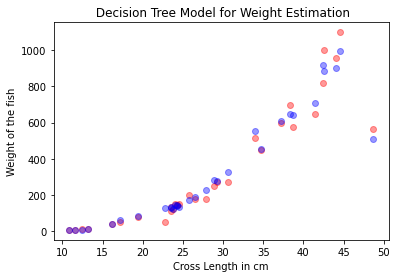

In [54]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title(' Decision Tree Model for Weight Estimation');

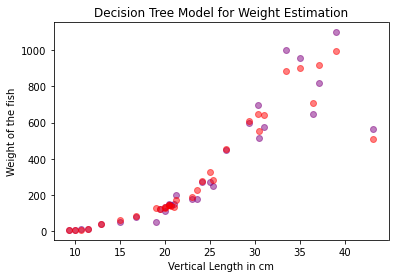

In [55]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='red', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Decision Tree Model for Weight Estimation');

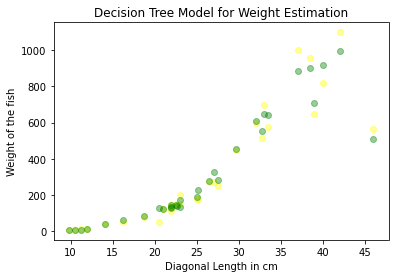

In [56]:
plt.scatter(X_test['LengthDia'], y_test, color='yellow', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Decision Tree Model for Weight Estimation');

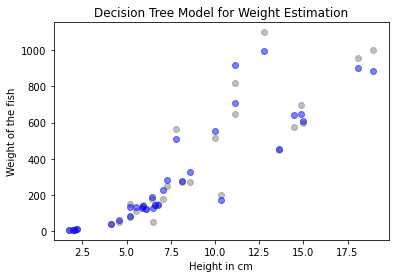

In [57]:
plt.scatter(X_test['Height'], y_test, color='grey', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Decision Tree Model for Weight Estimation');

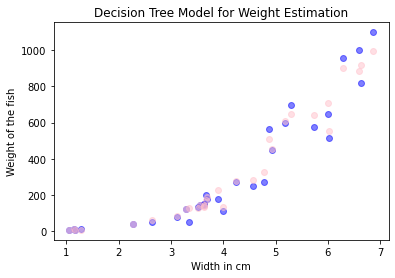

In [58]:
plt.scatter(X_test['Width'], y_test, color='blue', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='pink', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Decision Tree Model for Weight Estimation');

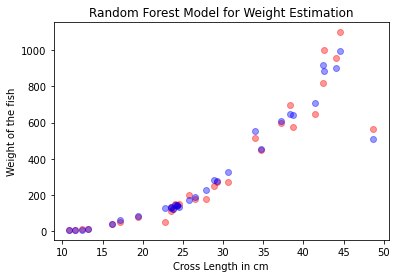

In [59]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Model for Weight Estimation');

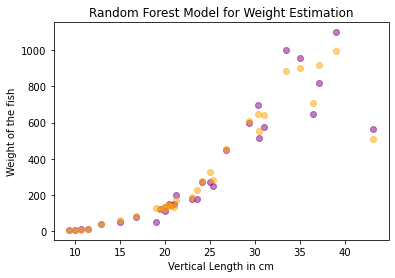

In [60]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Model for Weight Estimation');

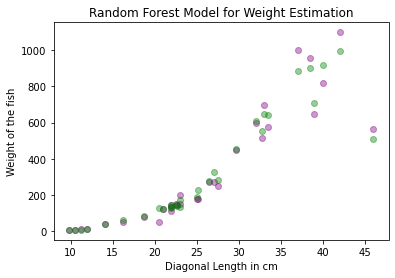

In [61]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Model for Weight Estimation');

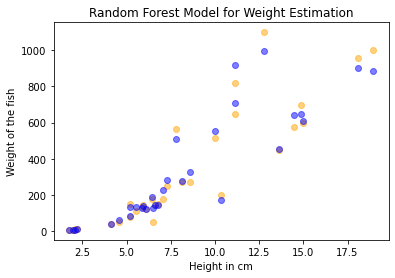

In [62]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Model for Weight Estimation');

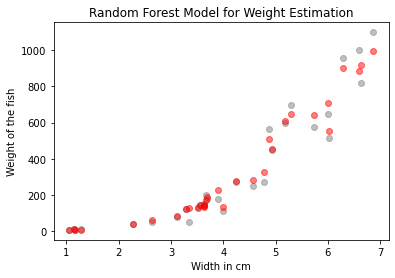

In [63]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Model for Weight Estimation');

In [64]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,706.710
1,60.479
2,228.960
3,904.370
4,39.805


In [65]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [66]:


#COMPARING REAL AND PREDICTED WEIGHTS
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew


,Weight,Estimated Weight
0,650.0,706.710
1,51.5,60.479
2,180.0,228.960
3,955.0,904.370
4,40.0,39.805
5,50.0,126.650
6,600.0,607.680
7,514.0,554.660
8,272.0,325.300
9,9.8,8.998


In [67]:
#These are the predicted  weights for my training dataset.
#The aim of this study is to estimate weight of the fish indivuduals from their measurements through using classification algorithms.